# Introduction

## Introducing the Dataset

This dataset includes data for graduate degrees admission (Masters), originally found on "Kaggle" (https://www.kaggle.com/mohansacharya/graduate-admissions)

The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit

First read of the datasets' columns we can conclude some few basic facts and assumptions: 
    
    1.Serial No. is just for providing a unique index and is thus ignored in any analysis, as it's improbable that it indicates an order of admission in terms of time or priority.
    
    2.Almost all data are assumed to be collerated to the chance of admission.

In a following section while "Exploring the Data", we will go through each variable individually.
       


# First Steps

## Importing Modules and Reading the .csv File

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
pd.get_option('display.width')
pd.set_option('display.width', 120)
sns.set(rc={'figure.figsize':(12.7,8.27)})


In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data.drop('Serial No.', inplace=True, axis=1)
data.rename({'Chance of Admit ': 'Chance of Admit'}, axis=1, inplace=True)

## Exploring the Data

### In General 

In [4]:
## Head of the data
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
## Correlation coeffecients 
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

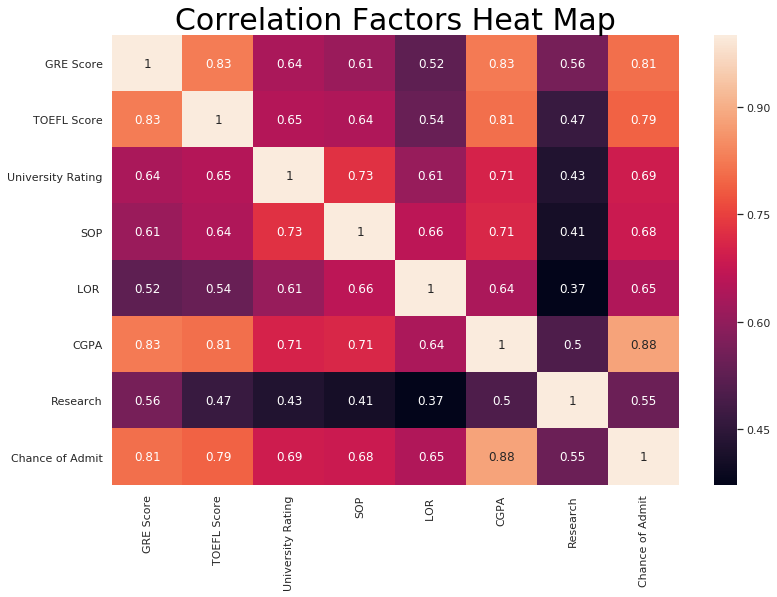

In [22]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='30')


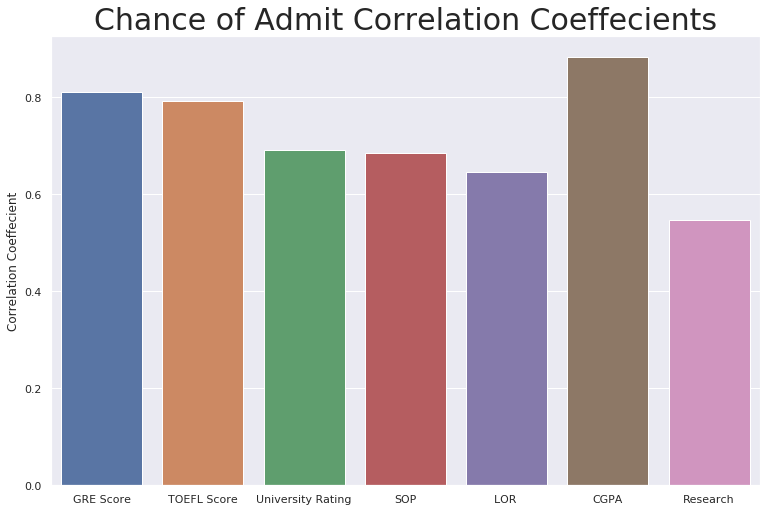

In [45]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(COA_corr_x, COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='30')
plt.show()

### GRE Scores

The Graduate Record Examinations (GRE) is a the most popular test for graduate schools' admission, it consists of three sections : Analytical Writing, Verbal and Quantitative.

The test's maximum score is 340 and minimum is 260, and according to an official GRE score document, the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 306.35 which rounds to 306 with an average standard deviation of 7.19

source: https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [9]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


The sample's GRE score mean is 316 which is a little bit higher than the mean mentioned previously (306)

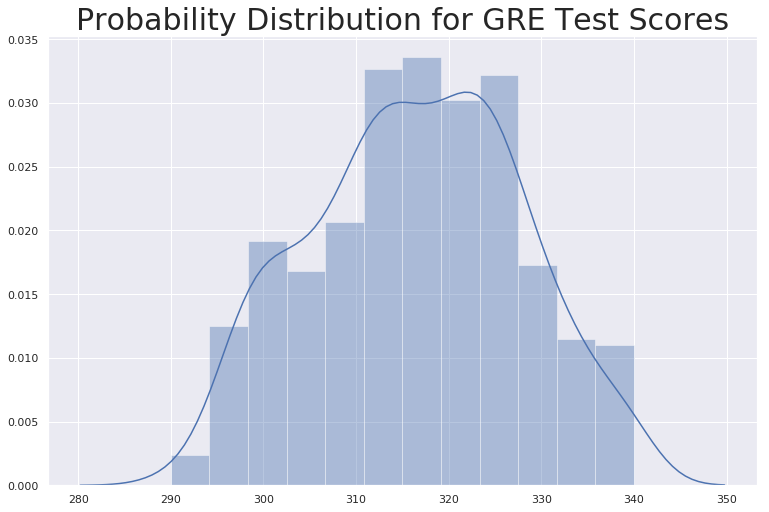

In [28]:
# Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='30')
plt.show()

As the distribution plot shows, the GRE test scores are somehow normally distributed.

In [11]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
TOEFL Score,0.827200
University Rating,0.635376
SOP,0.613498
LOR,0.524679
CGPA,0.825878
Research,0.563398
Chance of Admit,0.810351


### TOEFL Score


Test of English as a Foreign Language (TOEFL) is a very popular test for English language amongst universities worldwide, it is marked based on three sections: Reading, Listening, Speaking, and Writing, each one of them is out of 30, yielding a maximum score of 120 and a minimum of 0.

ETS (the institute that offers the test) recorded a mean score of 82.6 with a standard deviation of 19.5 (https://www.ets.org/s/toefl/pdf/94227_unlweb.pdf).

Although this is the mean for a wide range of students from all around the world that took the test for different purposes, as students applying for an engineering graduate degree might have a higher average than high school students.







In [18]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


It's evident that the sample over performs in the TOEFL.

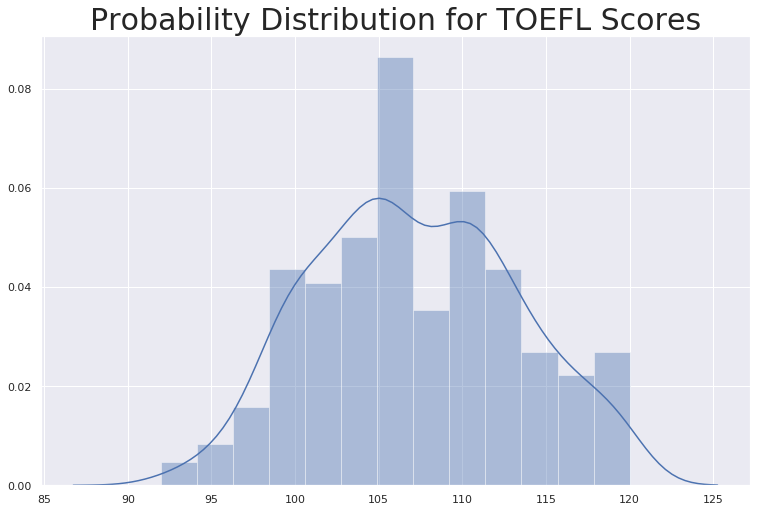

In [34]:
# Probability distribution for TOEFL Scores
sns.distplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='30')
plt.show()

### CGPA

Cumulative Grade Points Average (CGPA) is a measure of a student's marks thus his performance in his undergraduate degree.

In [30]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


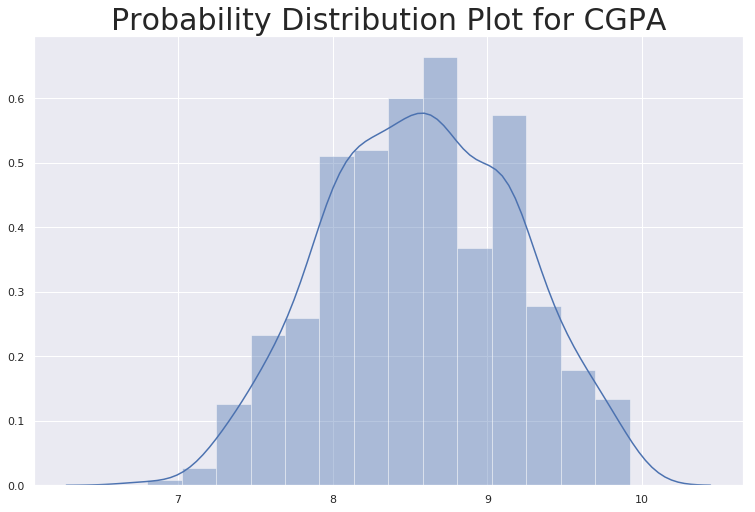

In [36]:
sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='30')
plt.show()

### Research

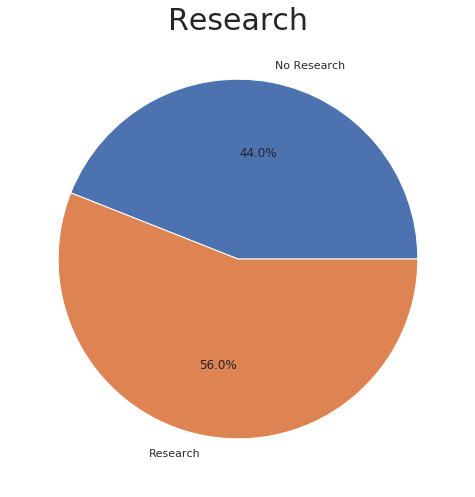

In [80]:
RES_Count = data.groupby(['Research']).count()
RES_Count = RES_Count['GRE Score']
RES_Count = pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score': 'Count'}, axis=1, inplace=True)
RES_Count.rename({0: 'No Research', 1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['Count'], labels=RES_Count.index, autopct='%1.1f%%')
plt.title('Research', pad=5, size=30)
plt.show()

### University Rating

The rating of the university the student completed his undergraduate degree from.

In [72]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,34
2,126
3,162
4,105
5,73


How good the university is a value between 1 and 5, and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

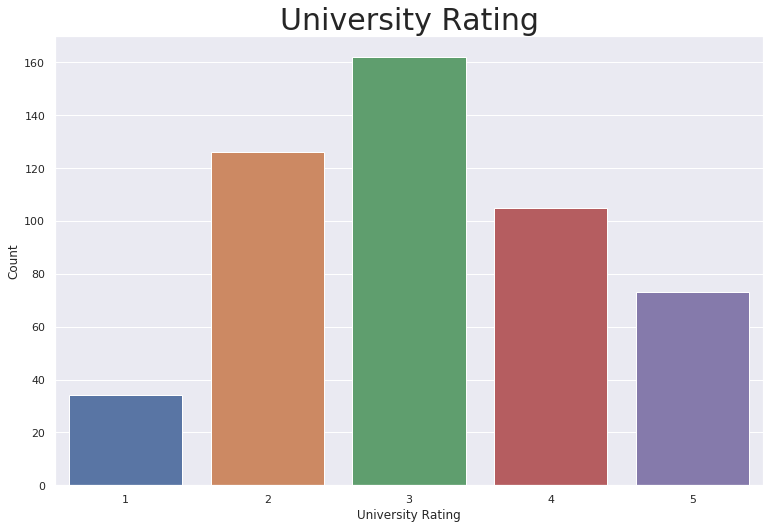

In [83]:
# Barplot for the distribution of the University Rating
sns.barplot(University_Rating.index, University_Rating['Count']).set_title('University Rating', size='30')
plt.show()